In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splev

#### Use chainconsumer contour as an example

In [3]:
from chainconsumer import ChainConsumer

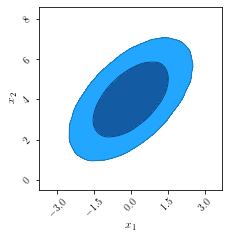

In [4]:
np.random.seed(0)
data = np.random.multivariate_normal([0.0, 4.0], [[1.0, 0.7], [0.7, 1.5]], size=1000000)

c = ChainConsumer()
c.add_chain(data, parameters=["$x_1$", "$x_2$"])
c.configure(plot_hists=False, sigmas=[1, 2])
fig = c.plotter.plot()

#### Method I: 
Use iter_segments() as suggested by matplotlib

In [5]:
def get_contour(cn):
    
    contours = []
    
    # for each contour line
    for cc in cn.collections:    
        # for each separate section of the contour line
        for pp in cc.get_paths():
            xy = []
            # for each segment of that section
            for vv in pp.iter_segments():                    
                xy.append(vv[0])
                
                # if the path close or stop
                if (vv[1]==79) or (vv[1]==0):
                    contours.append(np.vstack(xy))
                    xy = []
                    
    return contours

In [6]:
lines = get_contour(fig.axes[0])

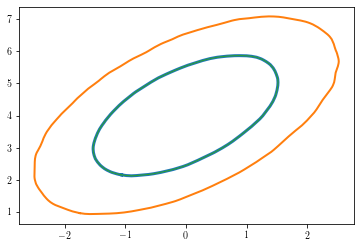

In [7]:
for i, line in enumerate(lines):
    plt.plot(line[:,0], line[:,1], lw=3-i)

#plt.plot(lines[0][:,0], lines[0][:,1], 'r')
#plt.plot(lines[1][:,0], lines[1][:,1], 'b')
#plt.plot(lines[2][:,0], lines[2][:,1], 'k', ls=':')

#### Method II:
use vertices in path obj directly

In [8]:
paths = fig.axes[0].collections[1].get_paths()[0]

In [9]:
v = paths.vertices
x = v[:,0]
y = v[:,1]

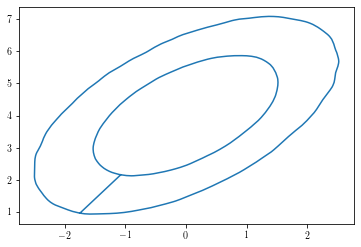

In [10]:
plt.plot(x, y)